In [ ]:
# Librarias necessárias
# Libs para manipulação de dados
import pandas as pd
import numpy as np

# Lib graficas ou de Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Avisos
# Função warnings.filterwarnings("ignore") Para evitar o Warning () avisos
import warnings
warnings.filterwarnings('ignore')

# Configuração no pandas
# Função pandas.set_option() para ajuste de linhas e colunas no () Parâmetros  (pat, valor)
# pat: Regexp que deve corresponder a uma única opção.
# valor: Novo valor da opção.
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração no Matplotlib
# Função plt.rcParams['figure.figsize'] = (15, 6) para ajustar o tamanho padrão
# Função plt.style.use('seaborn-darkgrid') para ajustar o estilo dos gráficos
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# **Exploração dos dados**

In [ ]:
# Pergunta em Aberto ...
# Quanto vale o aluguel da sua casa ?

In [ ]:
# Lendo os dados
# Função de leitura da base de dados importada no colab Base_Dados = pd.read_csv () entre (o nome do arquivo)
Base_Dados = pd.read_csv('house_data.csv')

# Dimensão
# A a função Python NumPy numpy.shape() encontra a forma de um array.
# Por shape, queremos dizer que ajuda a encontrar as dimensões de um array.
# Retorna a forma sob a forma de um tuple porque não podemos alterar um tuple tal como não podemos alterar as dimensões de um array.
Base_Dados.shape

(10692, 13)

In [ ]:
# Verificar
# A função head() exibe as linhas iniciais da base de dados, se nenhum valor for informado, esta função vai exibir as cinco primeiras linhas.
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
# Removendo colunas
# A função Drop drop() serve para eliminar linhas e colunas de tabelas, baseadas em um rótulo e eixo correspondentes, ou em um índice ou nome de coluna
# A função recebe parâmetros dentro de uma lista [], como quero remover colunas (columns [colunas]);
# Como desejo remover direto da base, utilizo o comando inplace=True após a passagem dos parâmetros
Base_Dados.drop( columns=['fire insurance (R$)', 'total (R$)'], inplace=True )

In [ ]:
# Verificar novamente
Base_Dados.shape

(10692, 11)

In [ ]:
# Campos vazios
# A função isnull() retorna um DataFrame de valores booleanos, onde cada célula do DataFrame original é recuperada por True caso o valor seja nulo (NaN)
# e False caso o valor seja válido. É muito útil para identificar os valores ausentes em um conjunto de dados
# Passando o parâmetro .sum ele passa a soma dos valores e o parâmetro .sort_values ele serve para ordenar o seu dataframe a partir de uma coluna,
# seja em ordem crescente de maneira padrão ou decrescente, passando o argumento ascending = False
Base_Dados.isnull().sum().sort_values( ascending=False )

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [ ]:
# Campos unicos
# A função Nunique, por outro lado, conta os valores distintos das colunas. Os valores NaN podem ser ignorados.
# Isso mostra apenas o número de categorias diferentes presentes em uma coluna de um dataframe.
Base_Dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [ ]:
# Tipos das colunas
# A função Pandas dataframe.info() é usada para obter um resumo conciso do dataframe, é muito útil para identificar dados NaN.
# Essa função aplicada sobre um dataframe, retorna uma tabela com informações de cada coluna do dataframe: quantidade de valores não NaN e tipo de dados.
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [ ]:
# Tipo de colunas
# A função .dtypes nos mostra que tipo de dados cada coluna contém
Base_Dados.dtypes.value_counts()

int64     7
object    4
dtype: int64

# **Exploração Analitica (EDA)**

In [ ]:
# Filtrar os tipos de colunas
# Criando uma função Colunas_Categoricas onde a função = Base_Dados.columns []
# Dentro de uma lista passo os parâmetros com a funçao .dtypes [ Base_Dados.dtypes com o argumento == object]
# Onde esta função me retorna todas as colunas categoricas
Colunas_Categoricas = Base_Dados.columns[ Base_Dados.dtypes == object ]
# Criando uma função Colunas_Numericas onde a função = Base_Dados.columns []
# Dentro de uma lista passo os parâmetros com a funçao .dtypes [ Base_Dados.dtypes com o argumento != object]
# Onde esta função me retorna todas as colunas não categoricas
Colunas_Numericas = Base_Dados.columns[ Base_Dados.dtypes != object ]
# Verificar as colunas categoricas e numéricas
Colunas_Categoricas, Colunas_Numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [ ]:
# Fotografia **
# Dados --> 90% aceita animal | próximo semestre 50% aceita imóvel

In [ ]:
# Analise dos campos objetos
# Na minha base dados eu busco a coluna cidade dentro de uma lista ['city'] com a função .value_counts este vai pegar
# cada registro da minha base de dados e agrupa, passando o parãmetro (normalize=True) ele vai me trazer a percentagem destas informações
# * 100 para apresentar com formato em percentual
Base_Dados['city'].value_counts( normalize=True ) * 100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [ ]:
# Loop
# para todas minhas colunas categóricas como no exemplo acima apenas com a coluna city
for Coluna in Colunas_Categoricas:

  # Fazendo a analise
  Analise = Base_Dados[Coluna].value_counts( normalize=True ) * 100

  # Mostrando
  print( Coluna, '\n', Analise, '\n')

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [ ]:
# Correção nos dados

# Ajustando o Andar
# Para achar a informação a ser corrigidas usamos o comando .loc
# O comando .loc  é baseado principalmente em rótulos de colunas, porém podemos utilizar um array booleano também.
# Quando nenhum item é encontrado ele retorna um KeyError.
Base_Dados.loc[ Base_Dados['floor'] == '301' ]

# Para corrigir a informação encontrada no comando .loc
# Utilizando o comando .iloc passamos como parâmetro [] o index, a posição da coluna com o = 30 se realiza o ajuste
# O indexador iloc é um tanto mais simples, ele seleciona por números inteiros das linhas, matrizes ou por fatia.
# Pode-se concluir que o iloc seleciona linhas e colunas por números
Base_Dados.iloc[ 2562, 5 ] = 30

# Ajustar o '-'
# Substituir o '-' por 0 porque esta coluna será transformada em numérico e se esta coluna tiver alguma informação de string vai dar problema
# Utilizando o comando .apply que se permite fazer condições e operaçoes dentro dentro da coluna
# Permite aos usuários passar uma função e aplicá-la em cada valor da série Pandas.
# As funções Lambda são chamadas de funções anônimas
# Nada mais são do que funções que o usuário não precisa definir, ou seja, não vai precisar escrever a função e depois utilizá-la dentro do código.
# Rescrevendo a Base_dados['floor'] = função criada
Base_Dados['floor'] = Base_Dados['floor'].apply( lambda Registro : 0 if Registro == '-' else Registro )

# Utilizando o comando pd.to_numeric para transformar a coluna floor de object para numérico
Base_Dados['floor'] = pd.to_numeric( Base_Dados['floor'] )

# Verificar
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [ ]:
# Verificar a correção da coluna andar ('floor') --> campos 301 e '-'
Base_Dados['floor'].value_counts( normalize=True )

0     0.230172
1     0.101104
2     0.092125
3     0.087074
4     0.069959
5     0.056117
6     0.050412
7     0.046483
8     0.045829
9     0.034512
10    0.033389
11    0.028339
12    0.024037
13    0.018706
14    0.015900
15    0.013749
16    0.010195
17    0.008979
18    0.007015
19    0.004957
20    0.004115
21    0.003928
25    0.002338
23    0.002338
22    0.002245
26    0.001871
24    0.001777
27    0.000748
28    0.000561
29    0.000468
32    0.000187
35    0.000094
46    0.000094
30    0.000094
51    0.000094
Name: floor, dtype: float64

In [ ]:
# Análise das colunas numéricas
len( Colunas_Numericas )

7

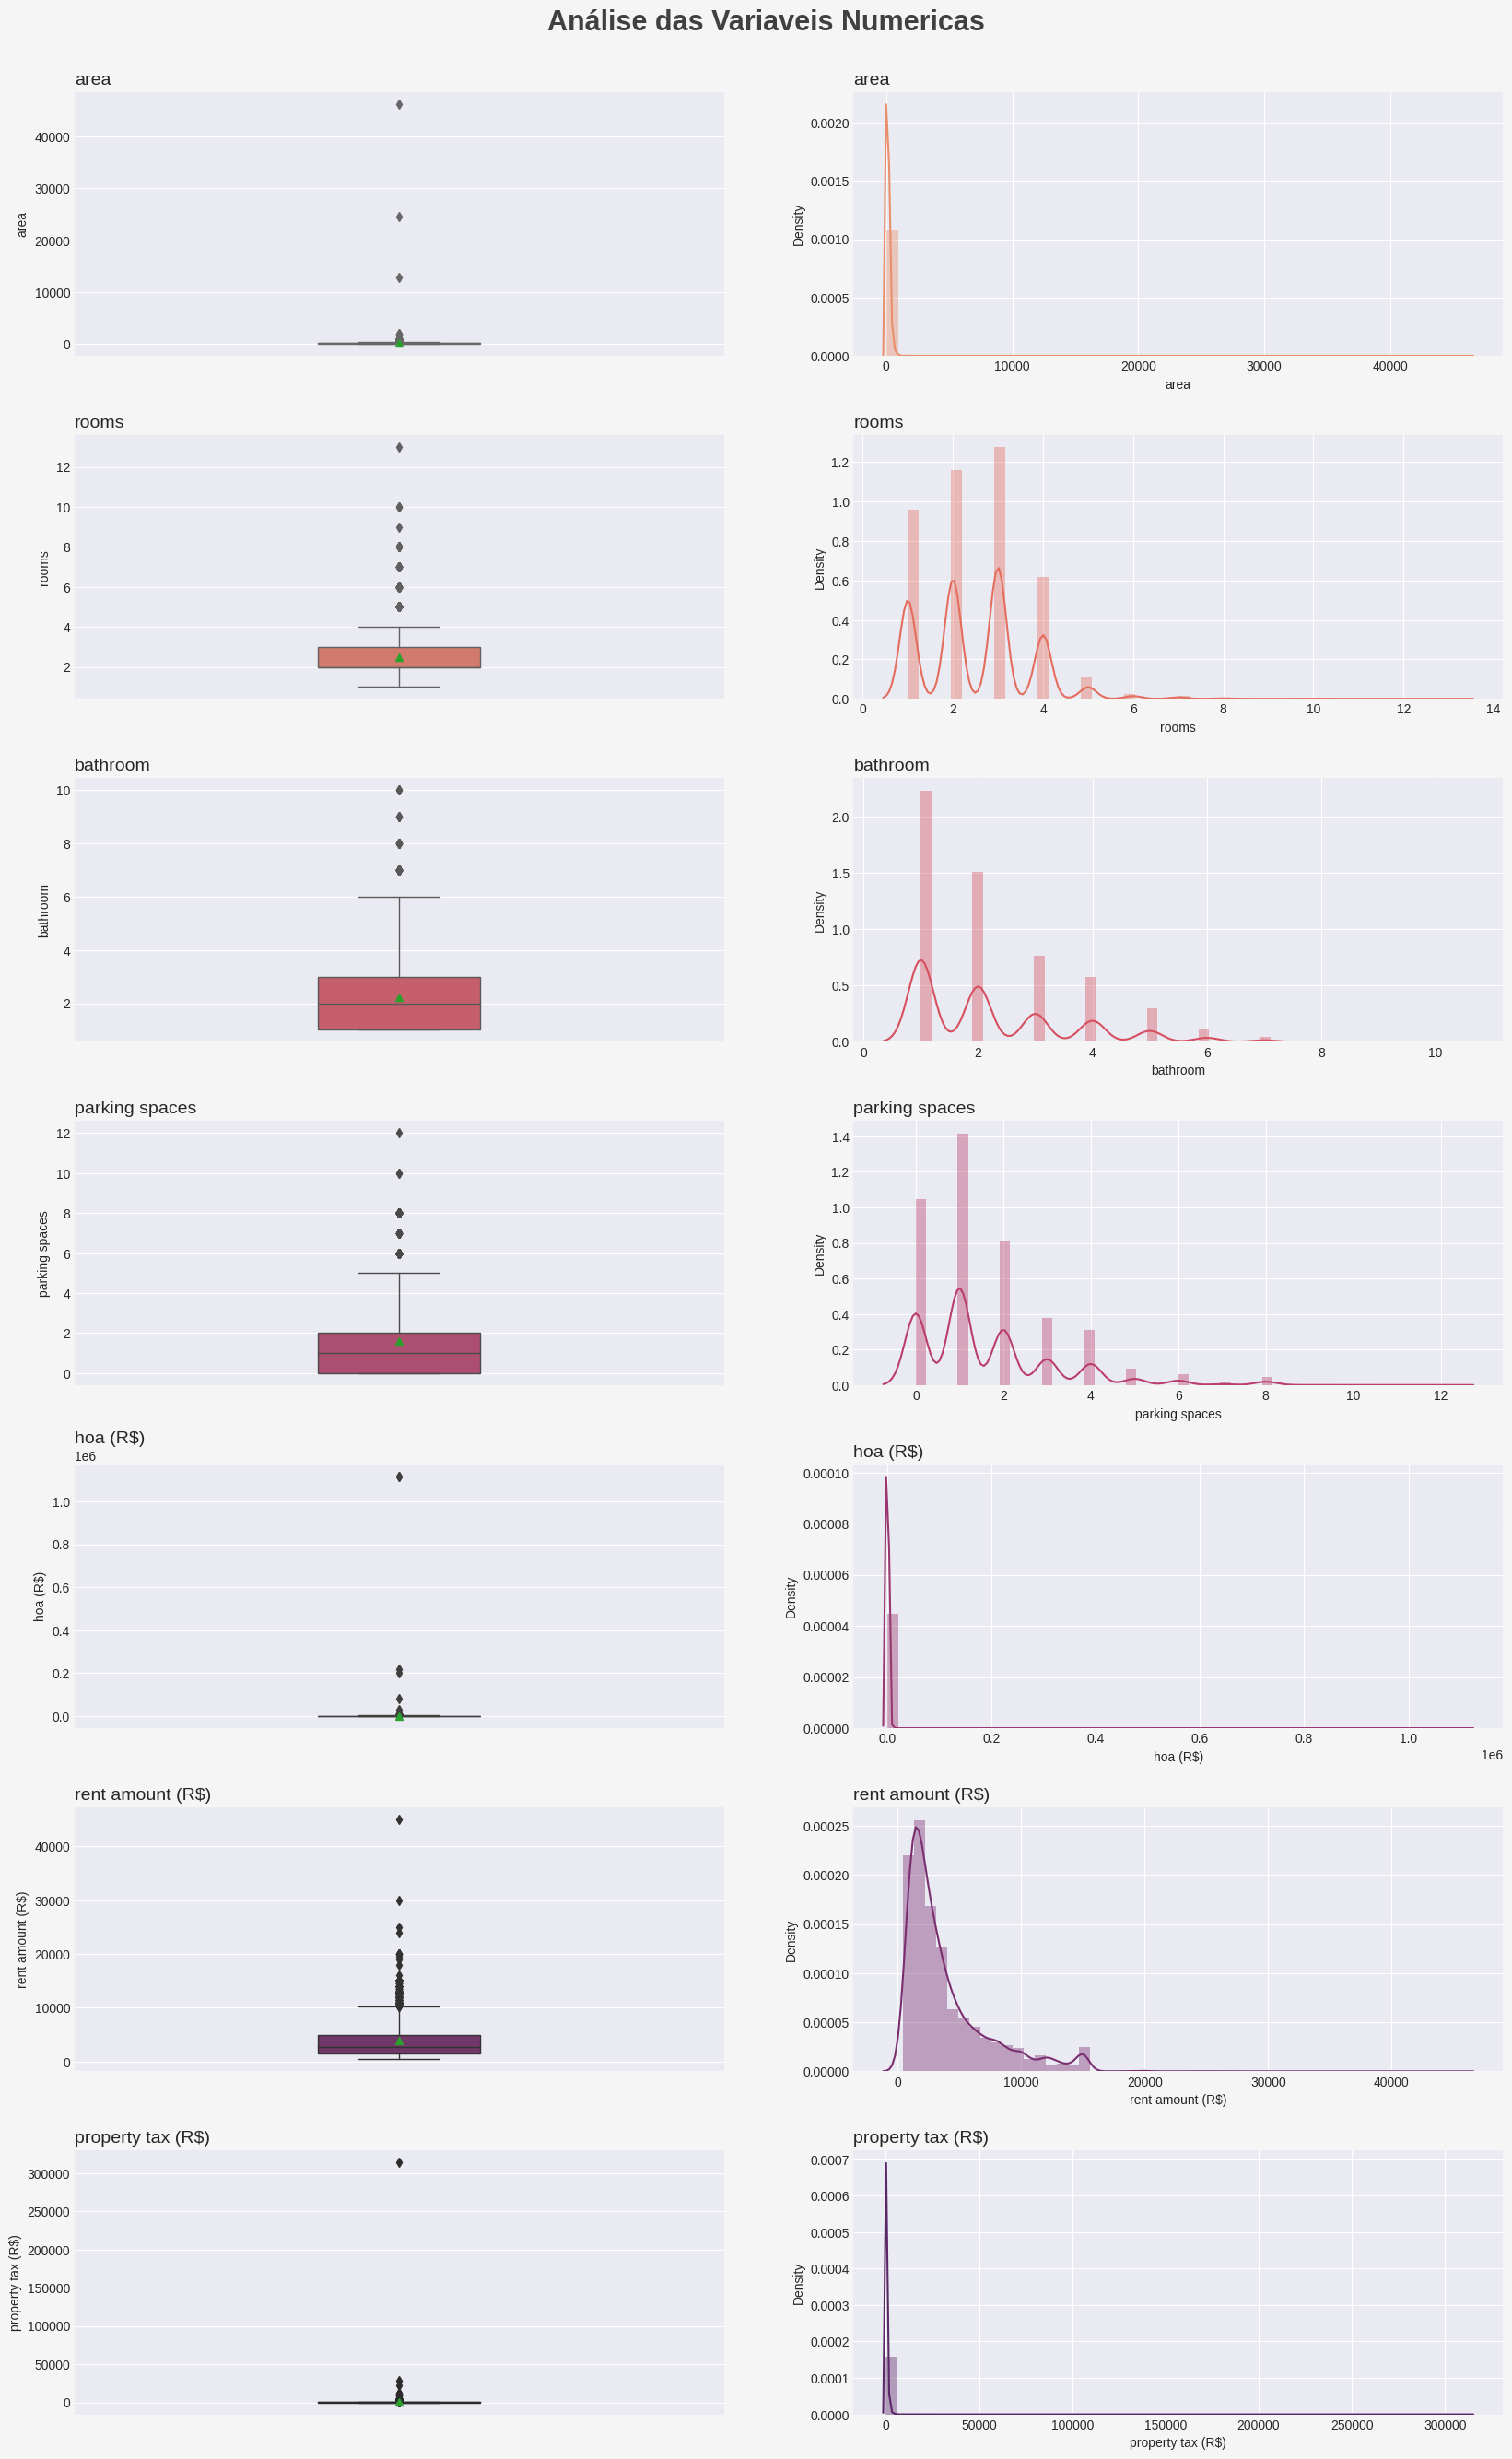

In [ ]:
# Grid - Gráficos
# Análise das colunas numéricas
# Primeiro fazer um boxplot

# Tamanho
Figura, Eixo = plt.subplots( figsize=(20, 30) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
Figura.set_facecolor( Cor_Fundo )

# Paleta de Cores
Paleta_Cores = sns.color_palette( 'flare', len(Colunas_Numericas) * 2 )

# Titulo
plt.suptitle('Análise das Variaveis Numericas', fontsize=22, color='#404040', fontweight=600 )

# Estrutura
Linhas = 7 # (Todas as infos numericas)
Colunas = 2 #( Boxplot - Distplot)
Posicao = 1 # Posicao inicial do grid

# Loop para plotar os gráficos
for Coluna in Colunas_Numericas:

  # Plot no Grid -- Boxplot
  plt.subplot( Linhas, Colunas, Posicao )

  # Titulo
  plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

  # Plot
  sns.boxplot( data=Base_Dados, y=Coluna, showmeans=True, saturation=0.75,
              linewidth=1, color=Paleta_Cores[Posicao], width=0.25 )

  # Mudar
  Posicao += 1

  # Plot no Grid -- Distplot
  plt.subplot( Linhas, Colunas, Posicao )

  # Titulo
  plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

  # Plot
  sns.distplot( Base_Dados[Coluna], color=Paleta_Cores[Posicao - 1] )

  # Mudar
  Posicao += 1

  # Ajute de Grid
  plt.subplots_adjust( top=0.95, hspace=0.3 )


In [ ]:
# Análise dos outliers do grafico boxplot area
Base_Dados.loc [ Base_Dados['area'] <=10000 ] ['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [ ]:
# Análise dos outliers do grafico boxplot Hoa/ Agora fazendo um filtro
Base_Dados.loc [ Base_Dados['hoa (R$)'] <=10000 ] ['hoa (R$)'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

In [ ]:
# Análise da coluna hoa (R$), utilizando um sort_values, ordenando do maior para o menor, mostrando os 20 primeiros valores do preço do condomínio
Base_Dados['hoa (R$)'].sort_values( ascending=False ).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: hoa (R$), dtype: int64

In [ ]:
# Busanco o primeiro valor com o iloc verificando o preço do condomínio
Base_Dados.iloc[ 2928 ]

city                 Rio de Janeiro
area                             35
rooms                             1
bathroom                          1
parking spaces                    0
floor                             1
animal                        acept
furniture                 furnished
hoa (R$)                      81150
rent amount (R$)               4500
property tax (R$)              9900
Name: 2928, dtype: object

In [ ]:
# Análise da coluna rent amount (R$), utilizando .describe
Base_Dados['rent amount (R$)'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: rent amount (R$), dtype: float64

In [ ]:
# Análise dos outliers do grafico boxplot rent amount (R$)/ Agora fazendo um filtro
Base_Dados.loc [ Base_Dados['rent amount (R$)'] <=40000 ] ['rent amount (R$)'].describe()

count    10691.000000
mean      3892.402488
std       3385.440586
min        450.000000
25%       1530.000000
50%       2660.000000
75%       5000.000000
max      30000.000000
Name: rent amount (R$), dtype: float64

In [ ]:
# Consulta nome das colunas
Base_Dados.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)'],
      dtype='object')

In [ ]:
# Análise da coluna property tax (R$), utilizando um sort_values, ordenando do maior para o menor, mostrando os 20 primeiros valores do preço do IPTU
Base_Dados['property tax (R$)'].sort_values( ascending=False ).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
1862       5000
Name: property tax (R$), dtype: int64

In [ ]:
# Busanco o primeiro valor com o iloc verificando o preço do IPTU
Base_Dados.iloc[ 6645 ]

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object

# **Eng de Features**

In [ ]:
# Ajuste das colunas categóricas, analisando a coluna animal, transformando em 0 ou 1 com o comando .map passando um dicionário onde 'acept':1, 'not acept':0
Base_Dados ['animal']=Base_Dados ['animal'].map( {'acept':1, 'not acept':0} )
# Ajuste das colunas categóricas, analisando a coluna furniture, transformando em 0 ou 1 com o comando .map passando um dicionário onde 'furnished':1, 'not furnished':0
Base_Dados ['furniture']=Base_Dados ['furniture'].map( {'furnished':1, 'not furnished':0} )

# Filtrar a cidade de São Paulo
# MVP --> Valor para o cliente --> RJ ---> BH, pensando em escalabilidade
Filtro_SP = Base_Dados.loc[ Base_Dados['city'] == 'São Paulo']

# Verificar
Filtro_SP.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [ ]:
# Verificar o NaN da coluna animal
Base_Dados ['animal'].value_counts()

1    8316
0    2376
Name: animal, dtype: int64

In [ ]:
# Retirando a coluna Cidade (informação sem sentido), utilizando o comando .drop
Filtro_SP.drop( columns=['city'], inplace=True )

In [ ]:
# Separar os dados
# Em Caracteristicas Minhas variaveis são --> area	rooms	bathroom	parking spaces	floor	animal	furniture	hoa (R$)
# Sendo assim vou exluir o campo rent amount (R$) de Caracteristicas
# E na minha variável previsor eu vou pegar apenas o campo rent amount (R$)
Caracteristicas = Filtro_SP.drop( columns=['rent amount (R$)'] )
Previsor = Filtro_SP['rent amount (R$)']

# Verificar
Caracteristicas.shape, Previsor.shape

((5887, 9), (5887,))

In [ ]:
# Caracterticas
Caracteristicas.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [ ]:
# Previsoor
Previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

In [ ]:
# Correlação
Filtro_SP.corr()

# Proxima de 1 - Correlação Possitva [ Ambas Sobem ]
# Proxima de -1 - Correlação Negativa [ Uma sobe outra desce ]

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


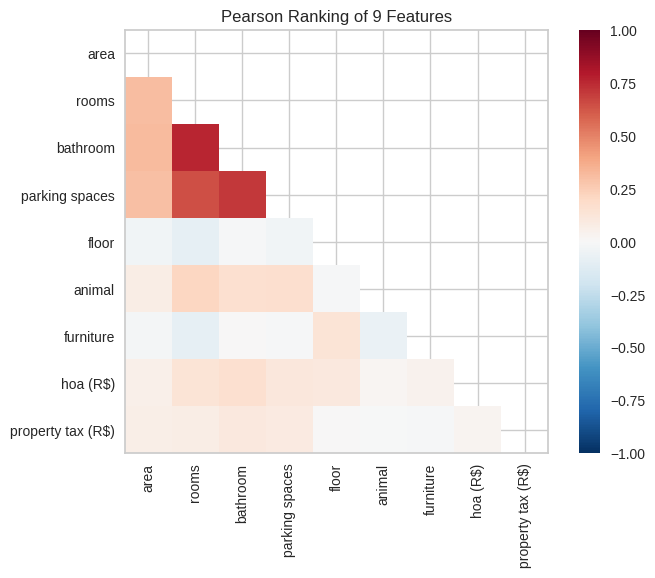

In [ ]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o metodo
Correlacao = Rank2D( algoritmo='pearson' )

# Fitar função
Correlacao.fit( Caracteristicas, Previsor )
Correlacao.transform( Caracteristicas )
Correlacao.show();


In [ ]:
# Separar os dados entre Teste e de Treino
from sklearn.model_selection import train_test_split

# Divisão dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(
    Caracteristicas, Previsor, test_size=0.2, random_state=10
)

print(f'Dados de Treino: { x_treino.shape[0] }')
print(f'Dados de Teste: { x_teste.shape[0] }')

Dados de Treino: 4709
Dados de Teste: 1178


In [ ]:
# Features mais relevantes
# Onde o mutual_info_regression avalia a dependencia entre 2 variaveis onde se for = 0 não existe depenndencia entre as varáveis, caso o contrario quanto maior o valor, maior a dependencia entre as variaveis
# Caso a dependencia entre 2 variaveis for = 0 iremos tirar do modelo
# Onde o SelectKBest seleciona as maiores features, vou selecionar todas
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# Selecao de features
def Selecao_Features( x_treino, y_treino ):

  # Configurar para selecionar as features
  Selecao = SelectKBest( score_func=mutual_info_regression, k=5 )

  # Fitar o aprendizado
  Selecao.fit( x_treino, y_treino )

  return Selecao

# Aplicar essa função
# Dentro do variável Scores eu chamei a minha função --> Selecao_Features passando como parãmetro --> x_treino, y_treino
# Meus dados de treino caíram dentro da variável --> Selecao onde se realizou a analise de relaçao mutua --> mutual_info_regression e selecionou as melhores features  --> k='all'
Scores = Selecao_Features( x_treino, y_treino )

# Analisar
# Estes valores basicamente são as relações que o modelo encontrou dentro das features
# Dentro do Scores quando eu passo o parâmetro .scores_ ele traz as relações da função mutual_info_regression
# No print adiconei o x_treino.columns para acessar as colunas no lado esquerdo e passo a posiçao para trazer os valores das relações para o lado direito
for Posicao, Score in enumerate( Scores.scores_ ):
  print( f' { x_treino.columns[Posicao] } : {Score}' )

 area : 0.06070091978160663
 rooms : 0.24541827403382221
 bathroom : 0.3158122727574959
 parking spaces : 0.22940159691390916
 floor : 0.027702807411546626
 animal : 0.020803961162370044
 furniture : 0.037003898897205456
 hoa (R$) : 0.07364026637220311
 property tax (R$) : 0.16081005993863817


In [ ]:
# Verificar as colunas x_treino
x_treino.columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal',
       'furniture', 'hoa (R$)', 'property tax (R$)'],
      dtype='object')

# **Construção do Modelo**

In [ ]:
# Modelo Random Forest Regresson
from sklearn.ensemble import RandomForestRegressor

# Instanciar
# Criando uma variável Modelo_Floresta e atribuindo a esta variável o algoritmo RandomForestRegressor
# Passando apenas o parâmetro --> max_depth=5 --> para ajustar a profundidade da árvore, para evitar questões de overfitting
Modelo_Floresta = RandomForestRegressor( max_depth=5 )

# Fitar
Modelo_Floresta.fit( x_treino, y_treino )

RandomForestRegressor(max_depth=5)

In [ ]:
# Avaliando a performance do modelo
# Crio a variável Previsoes e atribuindo a esta variável o Modelo_Floresta.predict
# Passando apenas o parâmetro --> x_teste
Previsoes = Modelo_Floresta.predict( x_teste )

# Ler os 5 primeiros registros da variável Previsoes
Previsoes[0:5]

array([1517.10943641, 9008.19072122, 7788.36551788, 4856.66290489,
       3389.86461781])

In [ ]:
# Ler os primeiros registros do x_teste
x_teste.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
9659,25,1,1,0,0,0,0,0,84
4671,480,4,5,3,0,1,0,0,742
7122,226,3,4,3,6,1,0,2200,1209
4221,100,2,4,2,12,0,1,885,330
8920,35,1,1,1,14,0,0,1700,275


In [ ]:
# Comparar com os primeiros registros do y_treino
y_treino.head()

7212    12000
2211      885
4147     3076
2644     4600
3375     4000
Name: rent amount (R$), dtype: int64

In [ ]:
# 3 Métricas para confrontar os Dados da Previsoes ( x_teste ) com os Dados Reais (y_treino)

# 1ª Função para avaliar --> mean_squared_error --> para avaliar o quanto o nosso modelo esta errando na média
# 2ª Função para avaliar --> r2_score --> para avaliar o quanto o nosso modelo se explica com a métrica de 0 a 1
# 3ª Função para avaliar --> sqrt --> Função da Raiz quadrada
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f'RMSE: { sqrt(mean_squared_error( y_teste, Previsoes ) ) } ')
print(f'Score: { r2_score( y_teste, Previsoes ) } ')


RMSE: 2460.187328824416 
Score: 0.5619456141944668 


In [ ]:
# Este RMSE: 2460.187328824416 indica que o nosso modelo está errando em torno de 2460 Reais
# Este Score: 0.5619456141944668 explica o nosso modelo

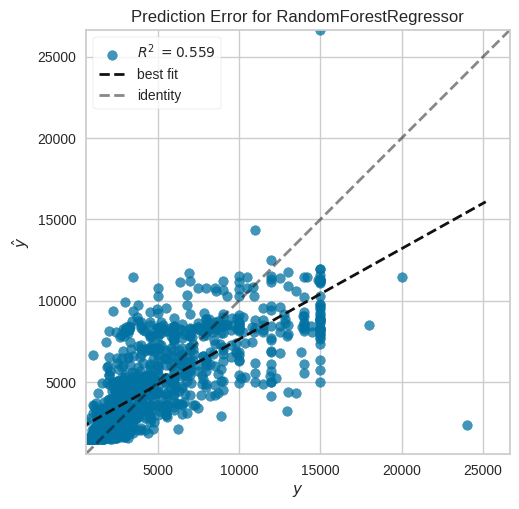

In [ ]:
# Avaliando com Yellowbrick utilizando a função PredictionError
from yellowbrick.regressor import PredictionError

# Instanciar O modelo RandomForestRegressor com a variável Modelo e o PredictionError com a variável Erro_Modelo
Modelo = RandomForestRegressor( max_depth=5 )
Erro_Modelo = PredictionError( Modelo )

# Fitar
Erro_Modelo.fit( x_treino, y_treino )
Erro_Modelo.score( x_teste, y_teste )
Erro_Modelo.show();

# **Exportação**

In [ ]:
# Exportando o modelo através da biblioteca joblib
import joblib

# Criando uma Função com .dump passando como variável o Modelo criado --> Modelo_Floresta e nomeando o arquivo do modelo a ser exportado 'Modelo_Floresta_Aleatorio_v100.pkl'
joblib.dump( Modelo_Floresta, 'Modelo_Floresta_Aleatorio_v100.pkl')

['Modelo_Floresta_Aleatorio_v100.pkl']

In [ ]:
# Testando o modelo treinado criando a função ---> Funcao_Modelo_Carregado com a função .load para leitura
# e passando como parâmetro o nome do arquivo do modelo a ser exportado 'Modelo_Floresta_Aleatorio_v100.pkl'
Funcao_Modelo_Carregado = joblib.load('Modelo_Floresta_Aleatorio_v100.pkl')

In [ ]:
# Verificar passando como parãmetro na função .predict o vetor criado --> x_teste.head(1).values
Funcao_Modelo_Carregado.predict( x_teste.head(1).values )



array([1517.10943641])

In [ ]:
# Verificando o segundo vetor --> x_teste.head(2).values
x_teste.head(2).values

array([[ 25,   1,   1,   0,   0,   0,   0,   0,  84],
       [480,   4,   5,   3,   0,   1,   0,   0, 742]])